In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np


# Stack Overflow Annual Developer Survey 2020
## analysis of dataset

### read data drom files

In [2]:
schema_df = pd.read_csv('./datasets/developer_survey_2020/survey_results_schema.csv', index_col='Column')
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [3]:
answers_df = pd.read_csv('./datasets/developer_survey_2020/survey_results_public.csv')
answers_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


### preparing data to analysis

In [4]:
# converting df with questions to series
schema = schema_df.QuestionText
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [5]:
# selecting the columns to analysis
for col in answers_df.columns:
    print(col)

Respondent
MainBranch
Hobbyist
Age
Age1stCode
CompFreq
CompTotal
ConvertedComp
Country
CurrencyDesc
CurrencySymbol
DatabaseDesireNextYear
DatabaseWorkedWith
DevType
EdLevel
Employment
Ethnicity
Gender
JobFactors
JobSat
JobSeek
LanguageDesireNextYear
LanguageWorkedWith
MiscTechDesireNextYear
MiscTechWorkedWith
NEWCollabToolsDesireNextYear
NEWCollabToolsWorkedWith
NEWDevOps
NEWDevOpsImpt
NEWEdImpt
NEWJobHunt
NEWJobHuntResearch
NEWLearn
NEWOffTopic
NEWOnboardGood
NEWOtherComms
NEWOvertime
NEWPurchaseResearch
NEWPurpleLink
NEWSOSites
NEWStuck
OpSys
OrgSize
PlatformDesireNextYear
PlatformWorkedWith
PurchaseWhat
Sexuality
SOAccount
SOComm
SOPartFreq
SOVisitFreq
SurveyEase
SurveyLength
Trans
UndergradMajor
WebframeDesireNextYear
WebframeWorkedWith
WelcomeChange
WorkWeekHrs
YearsCode
YearsCodePro


In [6]:
cols_to_analysis = [
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    
    'CompFreq',
    'CompTotal',
    'ConvertedComp',
    
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [7]:
# preparing df
survey_df = answers_df[cols_to_analysis].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,CompFreq,CompTotal,ConvertedComp,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,...,Monthly,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,...,NaN,NaN,NaN,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,...,NaN,NaN,NaN,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
schema_se = schema[cols_to_analysis]
schema_se

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
CompF

In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  CompFreq                40069 non-null  object 
 14  CompTotal               34826 non-null

In [10]:
survey_df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

In [11]:
# change col to numeric
to_numeric_list = ['Age1stCode', 'YearsCode', 'YearsCodePro', 'CompTotal', 'ConvertedComp']

for col in to_numeric_list:
    survey_df[col] = pd.to_numeric(survey_df[col], errors = 'coerce')

# change col to boolean
survey_df.Hobbyist = survey_df.Hobbyist=='Yes'

# change col to categorical
to_categorical = ['Gender', 'Country',
                  'EdLevel','UndergradMajor',
                  'LanguageWorkedWith', 'LanguageDesireNextYear',
                  'NEWLearn', 'Employment','JobSat',
                    'NEWOvertime', 'NEWEdImpt']

survey_df.where(~survey_df.Gender.str.contains(';', na=False), np.nan, inplace = True)

for col in to_categorical:
    survey_df[col] = pd.Categorical(survey_df[col], set(survey_df[col].unique())-{np.nan})

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 63757 non-null  category
 1   Age                     45192 non-null  float64 
 2   Gender                  50242 non-null  category
 3   EdLevel                 57128 non-null  category
 4   UndergradMajor          50739 non-null  category
 5   Hobbyist                64146 non-null  float64 
 6   Age1stCode              57171 non-null  float64 
 7   YearsCode               56484 non-null  float64 
 8   YearsCodePro            43932 non-null  float64 
 9   LanguageWorkedWith      57070 non-null  category
 10  LanguageDesireNextYear  53822 non-null  category
 11  NEWLearn                55862 non-null  category
 12  NEWStuck                54676 non-null  object  
 13  CompFreq                39865 non-null  object  
 14  CompTotal             

In [13]:
survey_df.describe()

,Age,Hobbyist,Age1stCode,YearsCode,YearsCodePro,CompTotal,ConvertedComp,WorkWeekHrs
count,45192.000000,64146.000000,57171.000000,56484.000000,43932.000000,3.465400e+04,3.458400e+04,40959.000000
mean,30.845990,0.781530,15.486226,12.790135,8.879131,3.206300e+242,1.037918e+05,40.783021
std,9.579533,0.413211,5.113130,9.494655,7.765939,inf,2.271922e+05,17.819472
min,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,24.000000,1.000000,12.000000,6.000000,3.000000,2.000000e+04,2.464800e+04,40.000000
50%,29.000000,1.000000,15.000000,10.000000,6.000000,6.300000e+04,5.400000e+04,40.000000
75%,35.000000,1.000000,18.000000,17.000000,12.000000,1.250000e+05,9.500000e+04,44.000000
max,279.000000,1.000000,85.000000,50.000000,50.000000,1.111111e+247,2.000000e+06,475.000000


In [14]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 99].index, inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)
survey_df.drop(survey_df[survey_df.CompTotal > 1e10].index, inplace=True)

<AxesSubplot:>

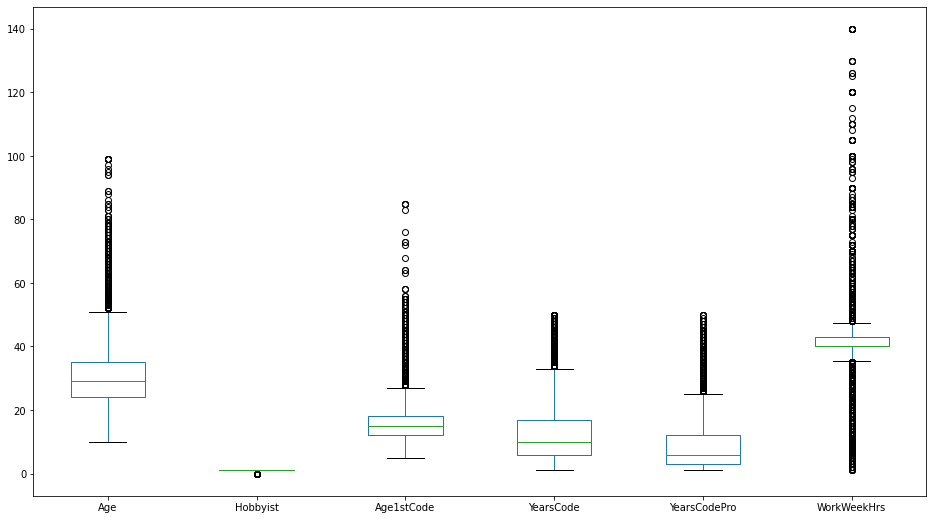

In [15]:
survey_df.drop(['CompTotal', 'ConvertedComp'], axis=1).plot(kind='box',figsize=(16,9))

In [16]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,CompFreq,CompTotal,ConvertedComp,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
28512,United States,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,1.0,6.0,11.0,NaN,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;JavaSc...,...,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
26441,Canada,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",1.0,19.0,11.0,7.0,TypeScript,...,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
18508,Sweden,55.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",1.0,16.0,40.0,NaN,NaN,...,NaN,NaN,NaN,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,How widely used or impactful my work output wo...,NaN,Fairly important
11485,Germany,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",1.0,10.0,20.0,12.0,Bash/Shell/PowerShell;C;Go;Haskell;HTML/CSS;Ja...,...,Yearly,85000.0,91883.0,Employed full-time,Data or business analyst;Data scientist or mac...,40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Critically important
60038,Austria,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",1.0,17.0,13.0,6.0,Bash/Shell/PowerShell;C;C++;Python,...,Monthly,4300.0,55776.0,Employed full-time,"Developer, back-end;Developer, embedded applic...",50.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Fairly important
63538,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,1.0,18.0,4.0,4.0,HTML/CSS;JavaScript;PHP,...,Monthly,NaN,NaN,Employed full-time,"Developer, back-end;Developer, full-stack",60.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Fairly important
34594,United States,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",1.0,15.0,20.0,14.0,Bash/Shell/PowerShell;Perl;Python;SQL;TypeScript,...,Yearly,NaN,NaN,Employed full-time,"Developer, full-stack;DevOps specialist",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
8222,Germany,21.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",1.0,14.0,5.0,3.0,Bash/Shell/PowerShell;Dart;HTML/CSS;Java;JavaS...,...,Monthly,2600.0,33732.0,Employed full-time,"Database administrator;Designer;Developer, bac...",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Not at all important/not necessary
2238,Netherlands,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",1.0,22.0,8.0,5.0,HTML/CSS;JavaScript;TypeScript,...,Monthly,10000.0,129720.0,"Independent contractor, freelancer, or self-em...","Developer, front-end;Developer, full-stack",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Fairly important
28591,Turkey,28.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",1.0,7.0,10.0,6.0,Java;Kotlin;Ruby,...,Monthly,14000.0,27612.0,Employed full-time,"Developer, mobile",40.0,Very dissatisfied,Specific department or team I’d be working on;...,Rarely: 1-2 days per year or less,Fairly important


In [17]:
survey_df.Country.value_counts().describe()

count      183.000000
mean       347.535519
std       1194.719834
min          1.000000
25%          8.000000
50%         49.000000
75%        282.000000
max      12367.000000
Name: Country, dtype: float64

### analysis

In [18]:
#matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] ='#fff'

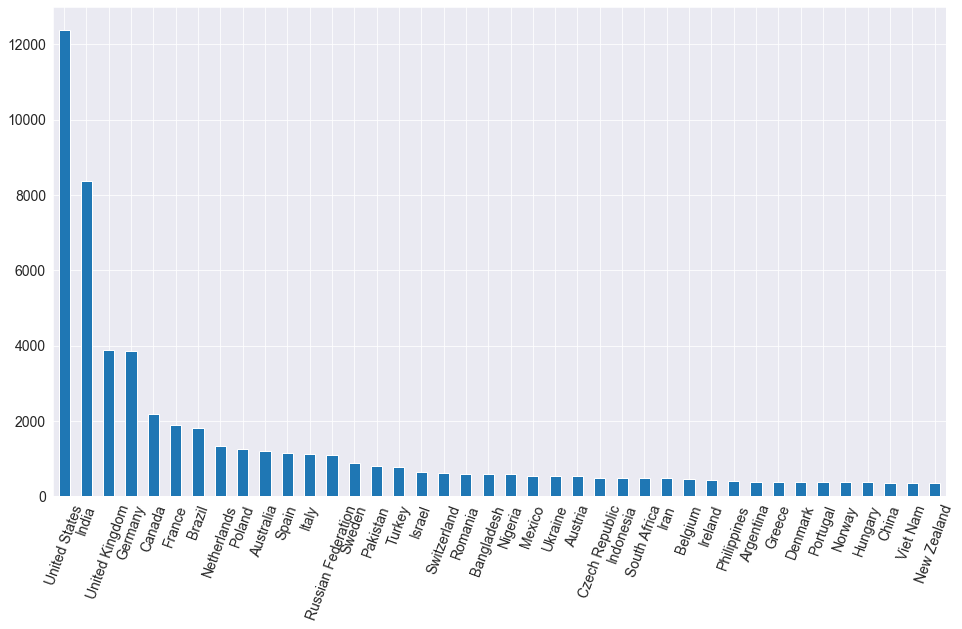

In [19]:
country_filter =  survey_df.Country.value_counts() > survey_df.Country.value_counts().mean()
survey_df.Country.value_counts()[country_filter].plot(kind='bar', figsize=(16,9))
plt.xticks(rotation=70)
None

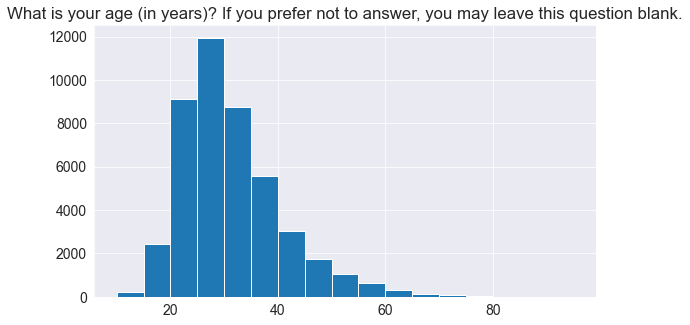

In [20]:
plt.hist(survey_df.Age, bins=range(10, 100, 5))
plt.title(schema.Age)
None

In [21]:
survey_df.groupby(pd.cut(survey_df.Age,np.array([10, 18, 30, 45, 60, 100]))).count().Age

Age
(10, 18]      1816
(18, 30]     24272
(30, 45]     15431
(45, 60]      3034
(60, 100]      510
Name: Age, dtype: int64

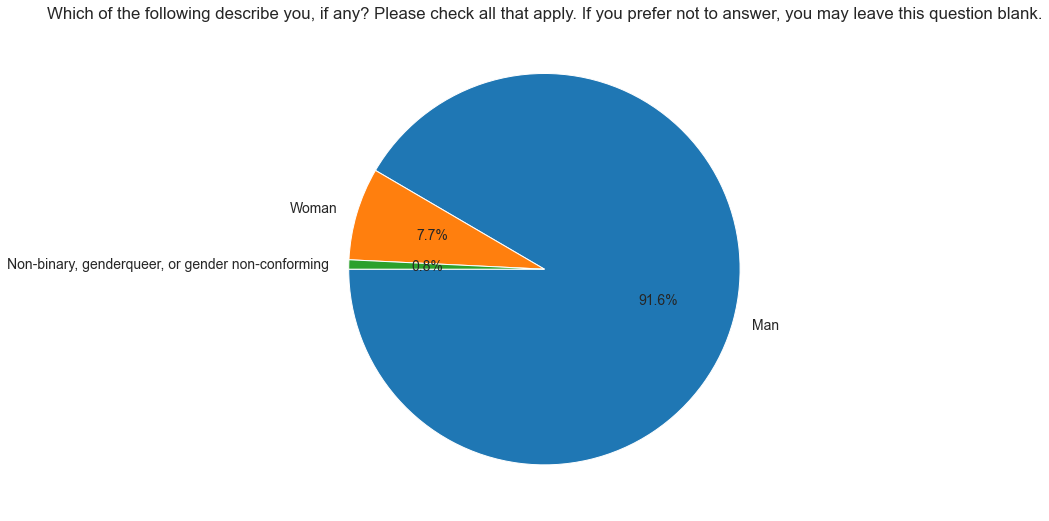

In [22]:
survey_gender = survey_df.Gender.value_counts()
plt.figure(figsize=(16,9))
plt.title(schema.Gender)
plt.pie(survey_gender, labels = survey_gender.index, autopct='%1.1f%%', startangle=180)
None

## Education and gender

In [26]:
EdLevNormByGen_df = pd.DataFrame([(round(ed,3)*100, *deg) 
for ed, deg in zip(EdLevNormByGen, EdLevNormByGen.index)],
columns=["Percent", 'Edu. lev.', 'Gender'])

In [27]:
EdLevNormByGen = survey_df.groupby('EdLevel')['Gender'].value_counts()/survey_df['Gender'].count()

In [28]:
hue_order = EdLevNormByGen_df.head(3).Gender.tolist()

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

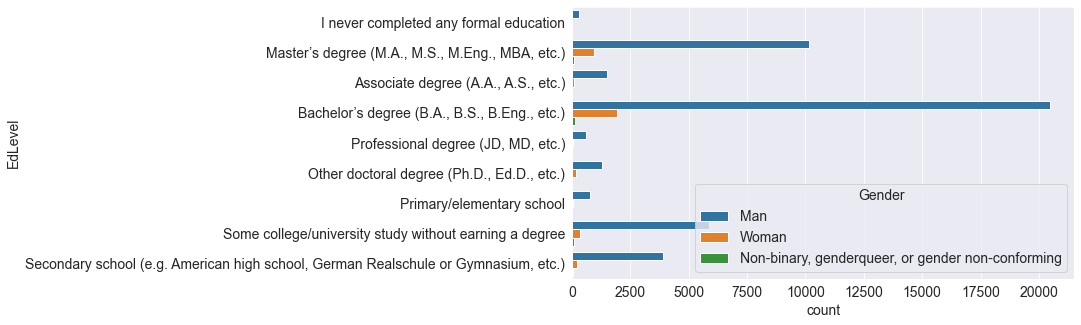

In [29]:
sns.countplot(y='EdLevel', data = survey_df, hue='Gender', hue_order=hue_order)

The chart above present who graduade wchich level of study. Abount half of developers has Bachelor's degree and abount quarter Master's degree, but we don't know specialization or faculty of the degrees, whether they are IT studies/degrees.

<AxesSubplot:xlabel='Percent', ylabel='Edu. lev.'>

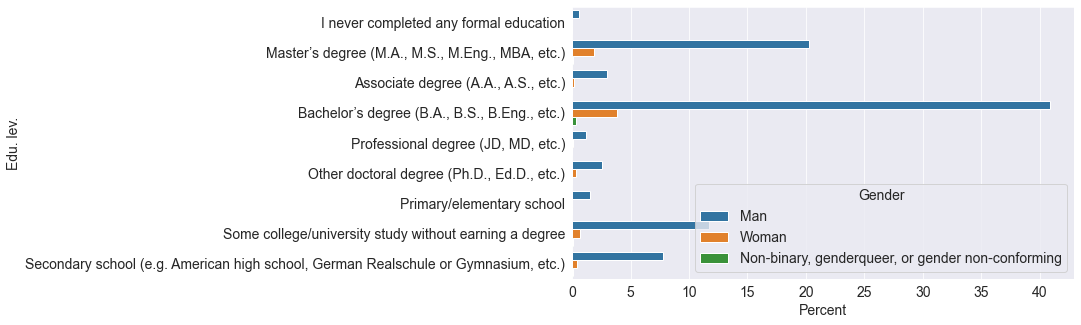

In [30]:
sns.barplot(x='Percent', y = 'Edu. lev.', hue='Gender', data = EdLevNormByGen_df)

Let's look at the same chart but percentages instead count values

In [32]:
undegrade_s = survey_df['UndergradMajor'].value_counts()*100/survey_df['UndergradMajor'].count()

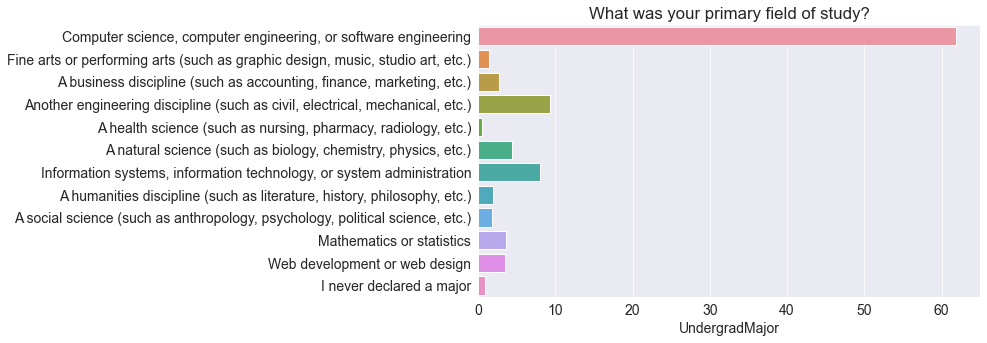

In [33]:
plt.title(schema.UndergradMajor)
sns.barplot(x=undegrade_s, y=undegrade_s.index)
None

As expected, most popular primary field of study is IT - over 60%.

In [34]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

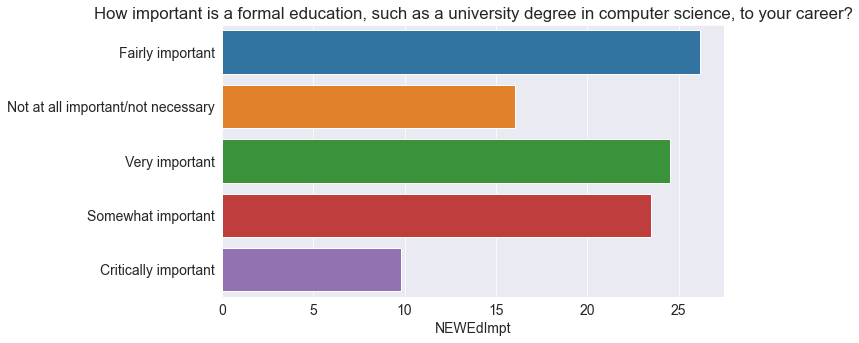

In [37]:
newedimpt_perc = survey_df.NEWEdImpt.value_counts() * 100/survey_df.NEWEdImpt.count()
plt.title(schema.NEWEdImpt)
plt.xlabel('%')
sns.barplot(x=newedimpt_perc,
           y=newedimpt_perc.index)
None

About 50% of developers said that university degrees are important (less or more) when you want to be a programmer and I think that it will change over time. Why? Now u can get a lot of information, do courses or get certifications on bootcamps, online courses or globaly - internet and these informations are so cheaper and more flexible - you can pause and continue when you want.  
Now a lot of companies are looking for people with experience and skills but degrees are not or less important. It's czas document.

Text(0.5, 0, 'Percentage')

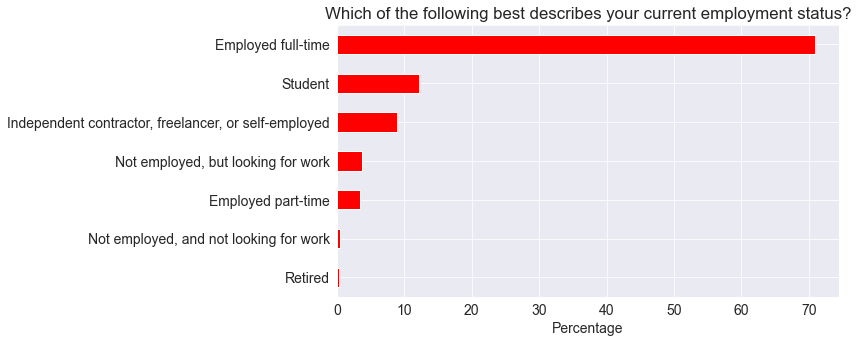

In [45]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot.barh(color='red')
plt.title(schema.Employment)
plt.xlabel('Percentage')

In [49]:
emp_list = np.array(survey_df.Employment.unique().tolist())
emp_list

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', 'nan', 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype='<U52')

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', 'Employed part-time'], dtype='<U52')

In [61]:
survey_df['EmploymentType'] = ['Professional' if emp in np.append(emp_list[:2],emp_list[5])
                               else 'Enthusiast'
                              for emp in survey_df.Employment]

# other way
# survey_df['EmploymentType'] = np.where(survey_df.Employment.isin(np.append(emp_list[:2],emp_list[5])),
#                                      'Professional', 'Enthusiast')

survey_df['EmploymentType'] = pd.Categorical(survey_df['EmploymentType'],
                                             set(survey_df['EmploymentType'].unique())-{np.nan})

survey_df

<ipython-input-61-bfbee4014a16>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  survey_df['EmploymentType'] = ['Professional' if emp in np.append(emp_list[:2],emp_list[5])


,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,CompTotal,ConvertedComp,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,EmploymentType
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",1.0,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Professional
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",0.0,19.0,7.0,4.0,JavaScript;Swift,...,NaN,NaN,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Professional
2,Russian Federation,NaN,NaN,NaN,NaN,1.0,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enthusiast
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",1.0,18.0,7.0,4.0,NaN,...,NaN,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,Enthusiast
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",1.0,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",1.0,16.0,10.0,NaN,NaN,...,NaN,NaN,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,Professional
64457,Morocco,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Professional
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enthusiast
64459,Poland,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,HTML/CSS,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Professional


In [92]:
def split_multicol(series):
    result_df = series.to_frame()
    options = []
    for idx, value in series[series.notnull()].iteritems():
        for option in value.split(';'):
            if option in options:
                options.append(option)
                result_df[option]=False
            result_df.at[idx, option] = True
    return result_df.iloc[:,1:]

In [93]:
devType_df = split_multicol(survey_df.DevType)

In [94]:
devType_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
64457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
dev_type_total = devType_df.sum(axis=0).sort_values(ascending=False)
dev_type_total

Developer, back-end                              26994.0
Developer, full-stack                            26910.0
Developer, front-end                             18127.0
Developer, desktop or enterprise applications    11685.0
Developer, mobile                                 9406.0
DevOps specialist                                 5913.0
Database administrator                            5656.0
Designer                                          5259.0
System administrator                              5185.0
Developer, embedded applications or devices       4699.0
Data or business analyst                          3967.0
Data scientist or machine learning specialist     3937.0
Developer, QA or test                             3891.0
Engineer, data                                    3700.0
Academic researcher                               3500.0
Educator                                          2894.0
Developer, game or graphics                       2750.0
Engineering manager            

In [99]:
round(dev_type_total['Data scientist or machine learning specialist']/dev_type_total.sum(),4)

0.0253

In [109]:
devType_df[survey_df.Gender=="Woman"].sum(axis=0).sort_values(ascending=False)

Developer, full-stack                            1476.0
Developer, back-end                              1329.0
Developer, front-end                             1196.0
Developer, mobile                                 458.0
Developer, desktop or enterprise applications     433.0
Designer                                          333.0
Data scientist or machine learning specialist     306.0
Data or business analyst                          282.0
Developer, QA or test                             251.0
Database administrator                            222.0
Academic researcher                               213.0
Engineer, data                                    186.0
Educator                                          178.0
DevOps specialist                                 154.0
Developer, embedded applications or devices       153.0
System administrator                              137.0
Scientist                                         120.0
Product manager                                 